In [2]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
%matplotlib inline

state 1
state 1
state 1
state 1
origin [0. 0.]
radius 27
arc_angle 0.93
sagitta 2.8668177286185452
origin [-24.13318227   0.        ]
[  0.         -12.10741564]
start_angle -0.465 
origin [-24.13318227   0.        ] 
start_point [  0.         -12.10741564]
end_angle 0.465 
origin [-24.13318227   0.        ] 
end_point [ 0.         12.10741564] 
 

start_angle 0.465 
origin [-24.13318227   0.        ] 
start_point [ 0.         12.10741564]
end_angle 1.3950000000000002 
origin [-24.13318227   0.        ] 
end_point [-19.41109162  26.58386465] 
 

start_angle 1.3950000000000002 
origin [-24.13318227   0.        ] 
start_point [-19.41109162  26.58386465]
end_angle 2.325 
origin [-24.13318227   0.        ] 
end_point [-42.62031202  19.6780597 ] 
 

start_angle 2.325 
origin [-24.13318227   0.        ] 
start_point [-42.62031202  19.6780597 ]
end_angle 3.2550000000000003 
origin [-24.13318227   0.        ] 
end_point [-50.95974173  -3.05543906] 
 

state 0
state 0
state 0
state 0
origin [0.

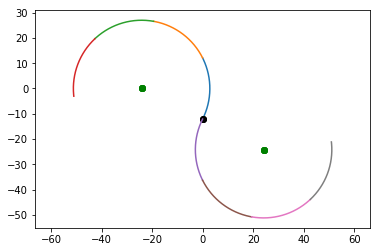

In [121]:
# bi-state 0 = bend to left --> draw link by moving through NEGATIVE angular displacement in regular cartesion FOR
# bi_state 1 = bend to right --> draw link by moving through POSITIVE angular displacement in regular cartesian FOR
# COA = central point of actuator 

def angle_to_Xdatum(point, o, r):
    "Returns angle between point-origin and 1st quadrant horizontal datum"
    x = 0
    y = 1
    origin = o
    radius = r
    acute_angle = np.arcsin(abs( origin[y] - point[y] ) / radius)
    quadrant = np.empty((2))
    quadrant[x] = 1 if (point[x] > origin[x]) else 0
    quadrant[y] = 1 if (point[y] > origin[y]) else 0

    if np.allclose(quadrant,  np.array([1, 1])):   angle = acute_angle
    elif np.allclose(quadrant,  np.array([0, 1])): angle = pi - acute_angle
    elif np.allclose(quadrant,  np.array([0, 0])): angle = pi + acute_angle
    else:                                          angle = 2 * pi - acute_angle
        
    return angle

# def redefine_arc_origin(point, angle_to_Xdatum, r):
#     " Redfines the arc origin by mirroring the present origin in the tanget to the arc at the point"
#     start_point = point
#     start_angle = angle_to_Xdatum
#     radius = r
    
#     origin = start_point + np.array([radius * np.cos(start_angle),                                             
#                                      radius * np.sin(start_angle)])

#     print("origin changed to", origin)
    
actuator_section = True    
    
def actuator_1way_series(n,
                         *, 
                         actuator_base = True,
                         radius = 27, 
                         base_links = [1, 1, 0, 1, 0 , 1 ,0], 
                         addtnl_links = [0, 1, 0, 1, 0, 1 ,0], 
                         arc_angle = 0.93, 
                         COA = [0.0, 0.0]): 
    "Plot 2D bistable actuators in a linked unidirectional series from a vertically aligned start section"
    
    numsegments = 1000
    x = 0
    y = 1
    
    state = base_links[n-1] if actuator_base else addtnl_links[n-1]
    print(f"state {state}")
    central_link_state = base_links[0]
    
    if n == 1:        
        # angle of start of arc 
#         if state:
#             start_angle = (0 - (arc_angle / 2)) 
#         else:
#             start_angle = (pi + (arc_angle / 2))
        if central_link_state:
            start_angle = (0 - (arc_angle / 2)) 
        else:
            start_angle = (pi + (arc_angle / 2))
        
        # origin of arc
        sagitta = radius * (1 - np.cos(arc_angle / 2))
        origin = np.array(COA)
        print(f"origin {origin}")
        print(f"radius {radius}")
        print(f"arc_angle {arc_angle}")
        print(f"sagitta {sagitta}")
        origin[x] += (radius - sagitta) * (-1 if central_link_state else 1)
        print(f"origin {origin}")
        
        # start point of arc
        start_point = np.array([origin[x] + radius * np.cos(start_angle), 
                                origin[y] + radius * np.sin(start_angle)])
        print(start_point)
        plt.plot(start_point[x], start_point[y], 'ko')
#         if actuator_base_link_state:
#             start_point = np.array([origin[x] + radius * np.cos(arc_angle / 2), 
#                                     origin[y] + radius * np.sin(arc_angle / 2)])
        
#         else:
#             start_point = np.array([origin[x] + radius * np.cos(arc_angle / 2), 
#                                 origin[y] + radius * np.sin(arc_angle / 2)])
        
        #print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
        
        
        if not actuator_base:
            print("not base")
            # if bistable state is different to first link of base actuator section ... 
            if state != central_link_state:
                print("mirroring...")
                
                # mirror origin 
                origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                                 radius * np.sin(start_angle)])

                print("origin changed to", origin)
                # redefine start_angle
                start_angle = angle_to_Xdatum(start_point, origin, radius)
                                
            #print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
            
    
    else: 
        AB = actuator_base
        R = radius
        BL = base_links
        AL = addtnl_links
        AA = arc_angle
        C = COA
        # angle of start of arc relative to horizontal datum
        start_angle, origin, start_point = actuator_1way_series(n-1, 
                                                                actuator_base = AB, 
                                                                radius = R,
                                                                base_links = BL,
                                                                addtnl_links = AL,
                                                                arc_angle = AA,
                                                                COA = C)
        #print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
        
        
        # if the bistable state is not same as previous link ...
        link_states = base_links if actuator_base else addtnl_links
        if link_states[n-1]!=link_states[n-2]:
#           # mirror origin of the arc in tangent to start point
            origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                             radius * np.sin(start_angle)])
            
            print("origin changed to", origin)
            start_angle = angle_to_Xdatum(start_point, origin, radius)
    
    
    # plot arcs 
#     arc_points = np.linspace(start_angle, 
#                              start_angle + (arc_angle * (1 if state else -1)), 
#                              numsegments) 
    print(f"start_angle {start_angle} \norigin {origin} \nstart_point {start_point}")
    
    
    if actuator_base:
        arc_points = np.linspace(start_angle, 
                             start_angle + (arc_angle * (1 if state else -1)), 
                             numsegments)
    
    else:
        arc_points = np.linspace(start_angle, 
                         start_angle + (arc_angle * (-1 if state else 1)), 
                         numsegments)
    

#     arc_points = np.linspace(start_angle, 
#                          start_angle + (arc_angle * 
#                                         ((1 if state else -1) if actuator_base_section 
#                                          else 
#                                          (-1 if state else 1))), 
#                          numsegments) 

    arc = np.array([origin[x] + radius * np.cos(arc_points), 
                    origin[y] + radius * np.sin(arc_points)])
   
    plt.plot(arc[x], arc[y])
    plt.plot(origin[x], origin[y], 'go')
    plt.xlim(0, 40)
    plt.ylim(0, 40)
    plt.axis('equal') 
    

    # store initial condition for bidirectional actuator constrauction
#     if n == 1:
#         start_point = arc[:, 0]
#         #print("start_point", start_point)
        
#         start_point_init = start_point
#         origin_init = origin 
        
    
    #plt.plot(start_point[x], start_point[y], 'ro')
    # end angle (between end_point-origin and 1st quadrant horizontal datum)
    end_point = arc[:, -1]   
    end_angle = angle_to_Xdatum(end_point, 
                                origin, radius)
    
    print(f"end_angle {end_angle} \norigin {origin} \nend_point {end_point} \n \n")
        
    return end_angle, origin, end_point 
    

    
BL = [1, 1, 1, 1, 1 ,0 ,1]
#BL = [1, 1, 0, 1, 0 , 1 ,0]
    
F = actuator_1way_series(4, actuator_base = True, base_links = BL) 

F = actuator_1way_series(4, actuator_base = False, base_links = BL,
                         addtnl_links = [0, 0, 0, 0, 0, 1, 0, 1])


print(F[0])   
print(F[1])  
print(F[2])  

  
        
        
        
        
        
        
        
        
        

state 1
state 0
state 0
start_angle 3.606592653589793 
 origin [24  0]
start_point [ -0.13318227 -12.10741564]
end_angle 2.676592653589793 
 origin [24  0] 
 end_point [-0.13318227 12.10741564] 

start_angle 2.676592653589793 
 origin [24  0] 
 start_point [-0.13318227 12.10741564]
end_angle 1.7465926535897924 
 origin [24  0] 
 end_point [19.27790935 26.58386465] 

origin changed to [-24.26636454 -24.21483128]
start_angle 3.606592653589793 
 origin [-24.26636454 -24.21483128] 
 start_point [ -0.13318227 -12.10741564]
(2.0765926535897927, array([24,  0]), array([10.91838628, 23.61930106]), array([ -0.13318227, -12.10741564]), array([24,  0]))


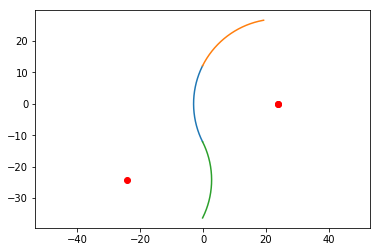

In [4]:
def actuator_2way_series(actuator_1way_series,
                         *, 
                         nLinksdir1, nLinksdir2, 
                         bi_states_dir1 = [0, 0, 1, 1, 0 ,0 ,0], 
                         bi_states_dir2 = [1, 0, 1, 1, 0 ,0 ,0], 
                         link_radius = 27, 
                         link_arc_angle = 0.93): 
    
    
    "Plot 2D bistable actuators in linked series' extending bidirectionally from a vertically aligned start section"
    
    numsegments = 1000
    x = 0
    y = 1

    n = nLinksdir2
    state = bi_states_dir2[n-1]
    print("state", state)  
    
    # import information about exisiting actuator section 
    end_angle_dir1, end_origin_dir1, end_point_dir1, start_point_dir1, origin_dir1 = actuator_1way_series(
    nLinksdir1,
    radius = link_radius, 
    bi_states = bi_states_dir1, 
    arc_angle = link_arc_angle,
    COA = [0, 0]
    )     

    if n == 1: 
            
        origin = origin_dir1
        start_point = start_point_dir1
        radius = link_radius
        arc_angle = link_arc_angle
        
        
        # angle of point at start of arc 
        start_angle = angle_to_Xdatum(start_point, origin, radius)
        
        
        # if bistable state is not same as first link of exisiting actuator section ... 
        if bi_states_dir1[0] != bi_states_dir2[0]:         
            # mirror origin 
            origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                             radius * np.sin(start_angle)])
            
            print("origin changed to", origin)
        print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
        
        
        # redefine start angle 
        start_angle = angle_to_Xdatum(start_point, origin, radius)
        
        # plot arcs 
        arc_points = np.linspace(start_angle, 
                                 start_angle + (arc_angle * (-1 if state else 1)), 
                                 numsegments)    

        arc = np.array([origin[x] + radius * np.cos(arc_points), 
                        origin[y] + radius * np.sin(arc_points)])

        plt.plot(arc[x], arc[y])
        plt.plot(origin[x], origin[y], 'ro')
        
#     else:
        
#         # angle of start of arc relative to horizontal datum
#         start_angle, origin, start_point, start_point_init, origin_init  = actuator_1way_series(n-1)
#         print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
        
        
#         # if the bistable state is not same as previous link ... 
#         if bi_states[n-1]!=bi_states[n-2]:
#             # mirror origin of the arc in tangent to start point
#             origin = start_point + np.array([radius * np.cos(start_angle),                                             
#                                              radius * np.sin(start_angle)])
            
#             print("origin changed to", origin)
#             start_angle = angle_to_Xdatum(start_point, origin, radius)
            
            
            
actuator_2way_series(actuator_1way_series, nLinksdir1=2, nLinksdir2=1)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.axis('equal')        
print(F)